# Erstellen einer Umsatzprognose
© Thomas Robert Holy 2019
<br>
Version 0.0.3
<br><br>
Visit me on GitHub: https://github.com/trh0ly
        
## Grundlegende Einstellungen
### Package Import

In [1]:
#----------------
# Web Scrap

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
import string

#----------------
# Prognose und Plots

import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import math

### Optikeinstellungen

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.width', 350)
plt.rcParams['figure.figsize'] = (12, 6) # macht die Plots größer

## Datenbeschaffung: Web Scrap historischer Daten von Statista

In [4]:
"""
#url = 'https://www.statista.com/statistics/475574/ebays-quarterly-net-revenue/' # ebay
#url = 'https://www.statista.com/statistics/409407/etsy-quarterly-revenue/' # Etsy
#url = 'https://www.statista.com/statistics/255957/revenue-of-target-in-north-america/' # Target
#url = 'https://www.statista.com/statistics/540128/quarterly-revenue-of-alphabet/' # Alphabet 
#url = 'https://www.statista.com/statistics/263427/apples-net-income-since-first-quarter-2005/' # Apple 
#url = 'https://www.statista.com/statistics/273963/quarterly-revenue-of-amazoncom/' # Amazon 
#url = 'https://www.statista.com/statistics/323046/alibaba-quarterly-group-revenue/' # Alibaba 

html = requests.get(url)
soup = BeautifulSoup(html.text, 'lxml')

chart = soup.find("tbody")
children = chart.find_all("tr")

data = []
for tag in children:
    data_tuple = (tag.text[:6],tag.text[6:])
    data.append(data_tuple)

quartals, revenues = [], []
for i in range(0, len(data)):
    x = data[i][0]
    y = data[i][1]
    quartal = x.replace(' ', '')
    y = y.replace(',', '.')
    y = y.replace('*', '')
    revenue = float(y)
    quartals.append(quartal)
    revenues.append(revenue)

quartals = quartals[::-1]
revenues = revenues[::-1]
print(quartals)
print(revenues)
"""

'\n#url = \'https://www.statista.com/statistics/475574/ebays-quarterly-net-revenue/\' # ebay\n#url = \'https://www.statista.com/statistics/409407/etsy-quarterly-revenue/\' # Etsy\n#url = \'https://www.statista.com/statistics/255957/revenue-of-target-in-north-america/\' # Target\n#url = \'https://www.statista.com/statistics/540128/quarterly-revenue-of-alphabet/\' # Alphabet \n#url = \'https://www.statista.com/statistics/263427/apples-net-income-since-first-quarter-2005/\' # Apple \n#url = \'https://www.statista.com/statistics/273963/quarterly-revenue-of-amazoncom/\' # Amazon \n#url = \'https://www.statista.com/statistics/323046/alibaba-quarterly-group-revenue/\' # Alibaba \n\nhtml = requests.get(url)\nsoup = BeautifulSoup(html.text, \'lxml\')\n\nchart = soup.find("tbody")\nchildren = chart.find_all("tr")\n\ndata = []\nfor tag in children:\n    data_tuple = (tag.text[:6],tag.text[6:])\n    data.append(data_tuple)\n\nquartals, revenues = [], []\nfor i in range(0, len(data)):\n    x = data

## Datensatz
### Daten initialisieren und DataFrame erstellen

In [5]:
"""
#-----------------------
# Amazon

revenues = [3.02, 2.89, 3.26, 5.67, 4.14, 4.06, 4.26, 6.7, 4.89, 4.65, 5.45, 9.52, 7.13, 6.57, 7.56,
            12.95, 9.86, 9.91, 10.88, 17.43, 13.19, 12.83, 13.81, 21.27, 16.07, 15.7, 17.09, 25.59,
            19.74, 19.34, 20.58, 29.33, 22.72, 23.19, 25.36, 35.75, 29.13, 30.4, 32.71, 43.74, 35.71,
            37.96, 43.74, 60.5, 51.04, 52.89, 56.58, 72.38, 59.7, 63.4]
"""
#-----------------------
# Apple

revenues = [0.3, 0.29, 0.32, 0.43, 0.57, 0.41, 0.47, 0.55, 1.01, 0.77, 0.84, 0.87, 1.64, 1.1, 1.13, 2.25, 2.26,
            1.62, 1.82, 2.53, 3.38, 3.07, 3.25, 4.31, 6.0, 5.99, 7.31, 6.62, 13.06, 11.62, 8.82, 8.22, 13.1, 9.55,
            6.9, 7.5, 13.07, 10.22, 7.75, 8.47, 18.02, 13.57, 10.68, 11.12, 18.36, 10.52, 7.8, 9.01, 17.89, 11.03,
            8.72, 10.71, 20.07, 13.82, 11.52, 14.13, 19.97, 11.56, 10.04, 13.69]
revenues = revenues[27:] # Veraltete Daten abschneiden

"""
#-----------------------
# Alibaba

revenues = [10.778, 10.95, 18.745, 12.031, 15.771, 16.829, 26.179, 17.425, 20.245, 22.171, 34.543, 24.184, 32.154,
            34.292, 53.248, 38.579, 50.184, 55.122, 83.028, 61.932, 80.92, 85.148, 117.278, 93.498, 114.924]
revenues = [x * 0.13 for x in revenues] # Wechselkurs Yuan <-> Euro 16.11.2019
"""

#-----------------------

print(len(revenues))

#-----------------------
# DataFrame erstellen

DataFrame = pd.DataFrame({'Revenue':revenues, 'Quartal':range(1,len(revenues) + 1)})
DataFrame.head()

33


,Revenue,Quartal
0,6.62,1
1,13.06,2
2,11.62,3
3,8.82,4
4,8.22,5


### Ploten der Ausgangsdaten

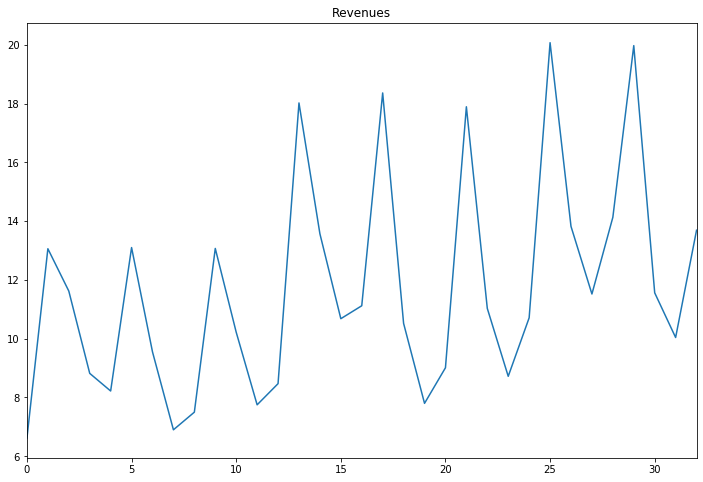

In [6]:
DataFrame.Revenue.plot(figsize=(12,8), title= 'Revenues', fontsize=10)

## Definition einiger Hilfsfunktionen
### Moving-Average

In [7]:
def moving_average(k, array, weights=None):
    
    # Keine Gewichtung von Perioden
    if weights == None:
        z_liste = [] # Leere Liste für MA
        # Bestimmung MA als Mittelwert aller Elemente um i mit der Reichweite k
        for i in range(k, len(array) - k):
            x = (i - k) # Vorgängerposition
            y = (i + k + 1) # Nachfolgerposition
            z = np.mean(array[x:y]) # Mittelwert von Vorgängerposition bis Nachfolgerposition
            z_liste.append(z) # Wert der Liste anfügen
            
    # Gewichtung von Perioden
    if weights != None:
        z_liste, temp_liste = [], [] # Leere Liste für MA und Zwischenschritt
        # Bestimmung MA als Mittelwert aller Elemente um i mit der Reichweite k
        for i in range(k, len(array) - k):
            x = (i - k) # Vorgängerposition
            y = (i + k + 1) # Nachfolgerposition
            temp = array[x:y] # Zwischenschritt welcher alle Elementen abspeichert
            temp_liste.append(temp) # Wert der Liste anfügen (Main-Array)
            
        # Für jedes Main-Array..
        for i in temp_liste:
            # ..Gewichtung der Elemete mit dazugehörigem Gewicht
            for j in range(0, len(i)):
                i[j] = i[j] * weights[j]
            
        # Bildung Mittelwert der gewichteten Elemente
        for i in temp_liste:
            i = np.mean(i)
            z_liste.append(i)
                   
    return z_liste 

### $\Delta t, \Delta z$ und $\Delta t \Delta z$

In [8]:
#-----------------------
# Delta t

def delta_t(t_array):

    mean_t = np.mean(t_array) # Mittelwert der Peridoen bestimmen
    
    delta_t_list = []
    # Delta t als Differenz von t und dem Mittelwert von allen t-Werten bestimmen
    for i in range(0, len(t_array)):
        delta_t = t_array[i] - mean_t # Differenz bilden
        delta_t_list.append(delta_t) # Wert der Liste anfügen
        
    delta_t_power_liste = [] # Leere Liste anlegen
    # Delta t^2 für jedes t bestimmen
    for i in delta_t_list:
        delta_t_power = np.power(i,2) # t quadrieren
        delta_t_power_liste.append(delta_t_power) # Wert der Liste anfügen
        
    # Summe der quadrierten ts bestimmen
    sum_delta_t_power_liste = np.sum(delta_t_power_liste)
    
    return delta_t_list, delta_t_power_liste, sum_delta_t_power_liste

#-----------------------
# Delta z

def delta_z(z_array, exp=False):
    
    mean_z = np.mean(z_array) # Mittelwert der beobachteten Werte bestimmen
    
    # Wenn ein exponentieller Trend vorliegt
    if exp == False:
        delta_z_list = [] # Leere Liste anlegen
        # Delta z als Differenz von z und dem Mittelwert von allen z-Werten bestimmen
        for i in range(0, len(z_array)):
            delta_z = z_array[i] - mean_z # Differenz bilden
            delta_z_list.append(delta_z) # Wert der Liste anfüge
            
    # Wenn kein exponentieller Trend vorliegt
    if exp == True:
        delta_z_list = [] # Leere Liste anlegen
        
        # Delta z^2 für jedes z bestimmen
        for i in range(0, len(z_array)):
            delta_z = np.log(z_array[i]) - np.log(mean_z) # Differenz bilden
            delta_z_list.append(delta_z) # Wert der Liste anfüge
                 
    return delta_z_list

#-----------------------
# Delta t Delta z

def delta_z__delta_t(delta_t_list, delta_z_list):
    
    delta_zt_liste = []  # Leere Liste anlegen
    # delta t mit delta z multiplizieren
    for i in range(0, len(delta_t_list)):
        delta_zt = delta_t_list[i] * delta_z_list[i] # delta t mit delta z multiplizieren
        delta_zt_liste.append(delta_zt) # Wert der Liste anfüge        
    
    # Summe der multiplizierten Werte bestimmen
    sum_delta_zt_liste = np.sum(delta_zt_liste)
    
    return delta_zt_liste, sum_delta_zt_liste

### Berechnung $a$ und $b$

In [9]:
def calc_ab(z_array, t_array, sum_delta_zt_liste, sum_delta_t_power_liste):
    
    # Mittelwerte bestimmen
    mean_z = np.mean(z_array)
    mean_t = np.mean(t_array)
       
    # Parameter a und bestimmen
    b = sum_delta_zt_liste / sum_delta_t_power_liste # Steigung berechnen
    a = mean_z - b * mean_t # Intercept berechnen
    
    return a, b

### Prognose (Zeitreihenanalyse)

In [10]:
def predict(a, b, array, exp=False):
    
    # Wenn kein exponentieller Trend vorliegt
    if exp == False:
        prediction_list = [] # Leere Liste anlegen
        # Berechnung des zu prognostizierenden Wertes
        for i in range(0, len(array)):
            prediction = a + b * array[i] # Prognostizierter Wert = Intercept + Steigung * Zeitreihenwert
            prediction_list.append(prediction) # Wert der Liste anfüge  
            
    # Wenn ein exponentieller Trend vorliegt
    if exp == True:
        prediction_list = [] # Leere Liste anlegen
         # Berechnung des zu prognostizierenden Wertes
        for i in range(0, len(array)):
            prediction = np.exp(a) * math.exp((b * array[i])) # Prognostizierter Wert = Intercept + Steigung * Zeitreihenwert
            prediction_list.append(prediction) # Wert der Liste anfüge  
        
    return prediction_list

### Bestimmtheitsmaß

In [11]:
def r_power(z_array, prediction_list):
    
    len_diff = (len(z_array) - len(prediction_list)) // 2    
    
    # 1 - r_power version
    mean_z = np.mean(z_array[len_diff: len(z_array) - len_diff]) # Mittelwert bestimmen
    
    a_list, b_list = [], [] # Leere Listen anlegen
    # Berechnung der quadrierten Abweichungen..
    for i in range(0, min(len(z_array), len(prediction_list))):
        # Prognostizierte Werte
        a = np.power((z_array[i] - prediction_list[i]), 2)
        a_list.append(a)
        
        # Tatsächlich beobachtete Werte
        b = np.power((z_array[i] - mean_z), 2)
        b_list.append(b)
        
    # Summen der beiden Listen ermitteln 
    sum_a_list = np.sum(a_list)
    sum_b_list = np.sum(b_list)
    
    r_power = 1 - (sum_a_list / sum_b_list) # Bestimmtheitsmaß berechnen
    
    #------------------------------------------
    # ursprüngliche version
    """
    mean_z = np.mean(z_array) # Mittelwert bestimmen
    
    a_list, b_list = [], [] # Leere Listen anlegen
    # Berechnung der quadrierten Abweichungen..
    for i in range(0, min(len(z_array), len(prediction_list))):
        # Prognostizierte Werte
        a = np.power((prediction_list[i] - mean_z), 2)
        a_list.append(a)
        
        # Tatsächlich beobachtete Werte
        b = np.power((z_array[i] - mean_z), 2)
        b_list.append(b)
        
    # Summen der beiden Listen ermitteln 
    sum_a_list = np.sum(a_list)
    sum_b_list = np.sum(b_list)
    
    r_power = sum_a_list / sum_b_list # Bestimmtheitsmaß berechnen
    """
    
    return r_power

### Berechnung des Residuums zwischen Moving-Average und Beobachtung

In [12]:
def calc_residual(rev, moving_average_list):
    
    # Liste Revenues auf Länge des MA kürzen
    cut_len = len(rev) - len(moving_average_list) # Differenz der Längen bestimmen
    start = int(cut_len / 2) # Startwert bestimmen
    end = int(len(rev) - cut_len / 2) # endwert bestimmen    
    rev = rev[start:end] # Liste kürzen
    
    residual_list = [] # Leere liste anlegen
    # Abweichung zwischen beobachteten Wert und MA berechnen
    for i in range(0, len(rev)):
        residuum = rev[i] - moving_average_list[i] # differenz berechnen
        residual_list.append(residuum) # Wert der Liste anfügen        

    return residual_list   

### Berechnung mittlere quartalsweise Sainsonkopmponente

In [13]:
def get_seasonal_components(residual_list):
    
    quartal_1_list = [] # Leere Liste anlegen
    # Jedes 4. Quartal ausgehend vom ersten Quartal
    # in der Liste speichern
    for i in range(0, len(residual_list), 4):
        quartal_1_list.append(residual_list[i])
     
    quartal_2_list = [] # Leere Liste anlegen
    # Jedes 4. Quartal ausgehend vom zweiten Quartal
    # in der Liste speichern
    for i in range(1, len(residual_list), 4):
        quartal_2_list.append(residual_list[i])
     
    quartal_3_list = [] # Leere Liste anlegen
    # Jedes 4. Quartal ausgehend vom dritten Quartal
    # in der Liste speichern
    for i in range(2, len(residual_list), 4):
        quartal_3_list.append(residual_list[i])
     
    quartal_4_list = [] # Leere Liste anlegen
    # Jedes 4. Quartal ausgehend vom vierte Quartal
    # in der Liste speichern
    for i in range(3, len(residual_list), 4):
        quartal_4_list.append(residual_list[i])
        
    # Mittelwerte der Listen berechnen um durchschnittliche
    # Saisonkomponente zu bestimmen
    seasonal_component_quartal_1 = np.mean(quartal_1_list)
    seasonal_component_quartal_2 = np.mean(quartal_2_list)
    seasonal_component_quartal_3 = np.mean(quartal_3_list)
    seasonal_component_quartal_4 = np.mean(quartal_4_list)
    
    # Liste mit Saisonkomponenten der Länge der residual_list angleichen
    seasonal_components_list = [seasonal_component_quartal_1, seasonal_component_quartal_2,
                               seasonal_component_quartal_3, seasonal_component_quartal_4] * int(len(residual_list))
    
    return seasonal_components_list

### Verbindung Saisonkomponente und MA-Komponente

In [14]:
def add_saison(prediction_list, seasonal_components):
    
    ma_saison_list = [] # Leere Liste anlegen
    
    # Saisonkomponente und MA zusammenfügen    
    for i in range(0, min(len(prediction_list), len(seasonal_components))):
        x = prediction_list[i] + seasonal_components[i] # Saisonkomponente und MA addieren
        ma_saison_list.append(x) # Wert der Liste anfügen
        
    return ma_saison_list    

### Funktion, welche alle obigen Funktionen vereint

In [15]:
def do_anything(k, revenues, weights=None, exp=False, return_model=False, plot=False, include_season=True):    
    
    moving_average_list = moving_average(k, revenues, weights)
    
    t_array = range(1, len(moving_average_list))

    delta_t_list, delta_t_power_liste, sum_delta_t_power_liste = delta_t(t_array)

    z_array = moving_average_list

    delta_z_list = delta_z(z_array, exp=exp)

    delta_zt_liste, sum_delta_zt_liste = delta_z__delta_t(delta_t_list, delta_z_list)

    if exp == True:
        a, b = calc_ab(np.log(z_array), t_array, sum_delta_zt_liste, sum_delta_t_power_liste)
    if exp == False:
        a, b = calc_ab(z_array, t_array, sum_delta_zt_liste, sum_delta_t_power_liste)

    prediction_for_list = range(1,len(moving_average_list) + 1)

    prediction_list2 = predict(a, b, prediction_for_list, exp=exp)

    if include_season == True:
        residual_list = calc_residual(revenues, moving_average_list)

        seasonal_components = get_seasonal_components(residual_list)

        prediction_list2 = add_saison(prediction_list2, seasonal_components)
        
    #-----------------------
    #
    if plot == True:
        len_diff = ((len(revenues) - len(prediction_list2)) // 2)     
        original_dict = {"quartal_original":list(range(0, len(revenues))),                   
                         "revenues_original": revenues}                   
        
        predict_dict = {"quartal_predict":list(range(len_diff, len(prediction_list2) + len_diff)),
                        "revenues_predict": prediction_list2}
        
        original_df = pd.DataFrame(original_dict)
        predict_df = pd.DataFrame(predict_dict)        
        
        orig = plt.plot(original_df.quartal_original, original_df.revenues_original, color='blue', label='Original')
        pred = plt.plot(predict_df.quartal_predict, predict_df.revenues_predict, color='red', label='Pred')
        plt.legend(loc='best')
        plt.title('Original vs. Pred_MA')
        plt.show()
  
    if return_model == True:
        
        z_array = revenues
        z_array = z_array[k:len(z_array) - k]
        r = r_power(z_array, prediction_list2)  
        
        return a, b, seasonal_components, r, prediction_list2

### Prognose (Zeitreihenverlängerung)

In [16]:
def future_predict(intercept, steigung, saison_komponente, prognose_zeitraum, exp=False):
    
    prognose_zeitraum = list(prognose_zeitraum) # Range in Liste umwandeln
    pred_list = predict(steigung, intercept, prognose_zeitraum, exp=exp) # Prognosewerte ermitteln
    saison_komponente = saison_komponente[0:4] * len(prognose_zeitraum) # Liste mit Saisonkomponente kürzen und wieder verlängern
    saison_komponente = saison_komponente[0:len(pred_list)] # Liste mit Saisonkomponente angleichen
    match = add_saison(pred_list, saison_komponente) # Prognosewerte und Saisonkomponente zusammenfügen

    # Dict und DataFrame anlegen
    predict_dict2 = {"quartal_predict":list(range(len(match))),
                            "revenues_predict": match}
    predict_df2 = pd.DataFrame(predict_dict2) 

    # Plotten
    plt.plot(predict_df2.quartal_predict, predict_df2.revenues_predict, color='red', label='Prognose')
    plt.legend(loc='best')
    plt.title('Prognose')
    left, right = plt.xlim()
    plt.xlim(right=len(prognose_zeitraum) + len(prognose_zeitraum) * 0.1)
    plt.xlim(left=0)
    top, bottom = plt.ylim()
    plt.ylim(top=max(match) + max(match) * 0.1)
    plt.ylim(bottom=min(match) - max(match) * 0.1)
    plt.show()
    
    return match

## Zeitriehenanalyse unter Verwendung obiger Funktionen
### Experimente

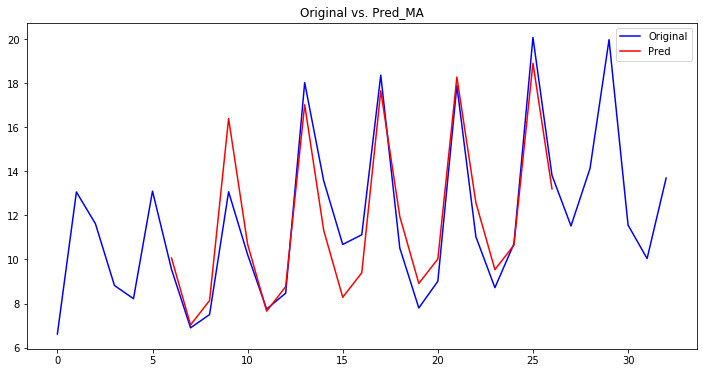

MA-Lags: 6
Gewichte: [1, 1, 1, 1, 0.75, 1, 1, 1, 0.6, 1, 1, 1, 1]
MA-Lags: 6, R^2=0.8825827176744394


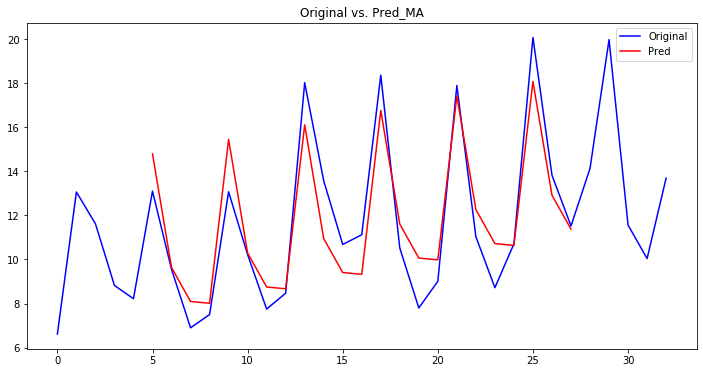

MA-Lags: 5
Gewichte: [1, 1, 1, 0.75, 1, 1, 1, 0.6, 1, 1, 1]
MA-Lags: 5, R^2=0.8500689545682396


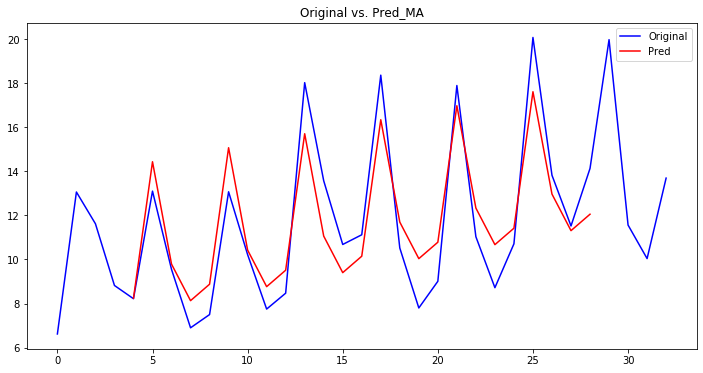

MA-Lags: 4
Gewichte: [1, 1, 0.75, 1, 1, 1, 0.6, 1, 1]
MA-Lags: 4, R^2=0.82732551714055


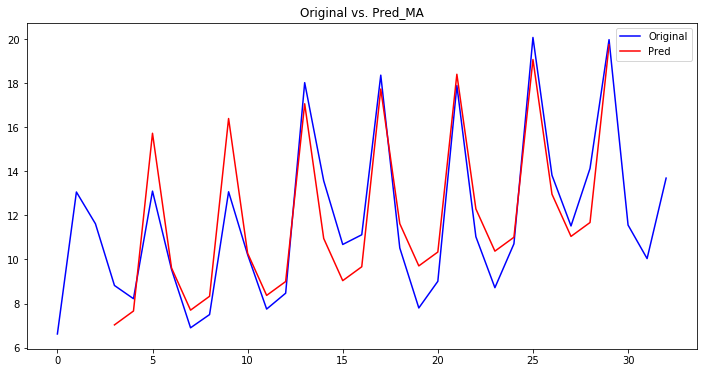

MA-Lags: 3
Gewichte: [1, 0.75, 1, 1, 1, 0.6, 1]
MA-Lags: 3, R^2=0.863188692548039


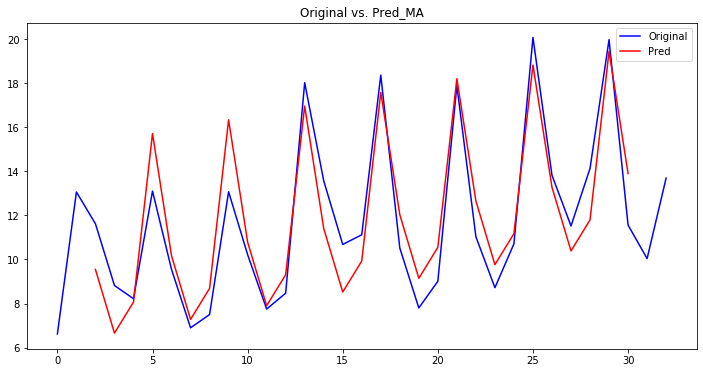

MA-Lags: 2
Gewichte: [0.75, 1, 1, 1, 0.6]
MA-Lags: 2, R^2=0.8361691248204259


In [17]:
k_list = [6,5,4,3,2,1]
weight_list = [[1,1,1,1,0.75,1,1,1,0.6,1,1,1,1],
               [1,1,1,0.75,1,1,1,0.6,1,1,1],
               [1,1,0.75,1,1,1,0.6,1,1],
               [1,0.75,1,1,1,0.6,1],
               [0.75,1,1,1,0.6],
               [1,1,1]]

for i in range (0, 4 + 1):
    _, _, _, r, _ = do_anything(k_list[i], revenues, weight_list[i], exp=False, return_model=True, plot=True, include_season=True)
    print('MA-Lags: {}'.format(k_list[i]))
    print('Gewichte: {}'.format(weight_list[i]))
    print('MA-Lags: {}, R^2={}'.format(k_list[i],r))

## Einzelfallbetrachtung
### Bester Fit (optisch)

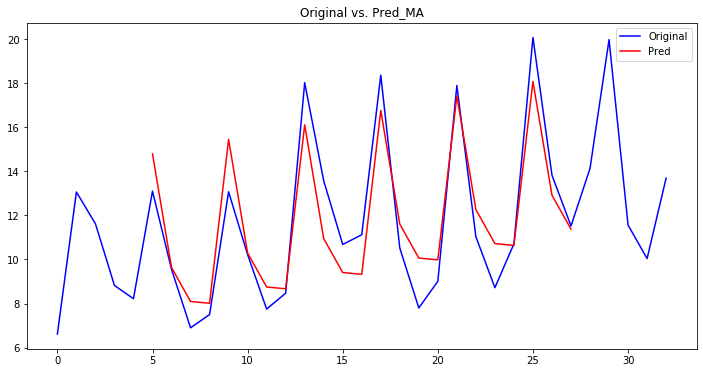

0.8500689545682396


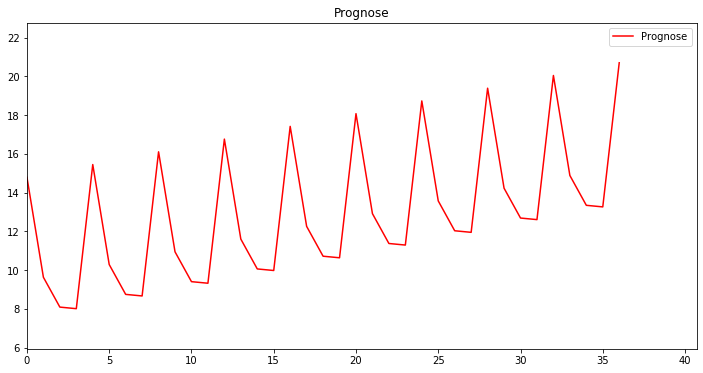

In [18]:
#-----------------------
# Parameter

"""
#---------
# Alibaba
k = 5
weights = [1, 1, 1, 0.75, 1, 1, 1, 0.6, 1, 1, 1]
"""
#---------
# Apple
k = 5
weights = [1, 1, 1, 0.75, 1, 1, 1, 0.6, 1, 1, 1]
"""
#---------
# Amazon
k = 3
weights = [1, 0.75, 1, 1, 1, 0.6, 1]
"""

steigung, intercept, saison_komponente, r, _ = do_anything(k, revenues, weights=weights, exp=False, return_model=True, plot=True, include_season=True)
print(r)

#-----------------------
# Fortschreibung

prognose_zeitraum = list(range(1, len(revenues) + 5))

_ = future_predict(intercept, steigung, saison_komponente, prognose_zeitraum, exp=False)

### Bester fit nach $R^2$

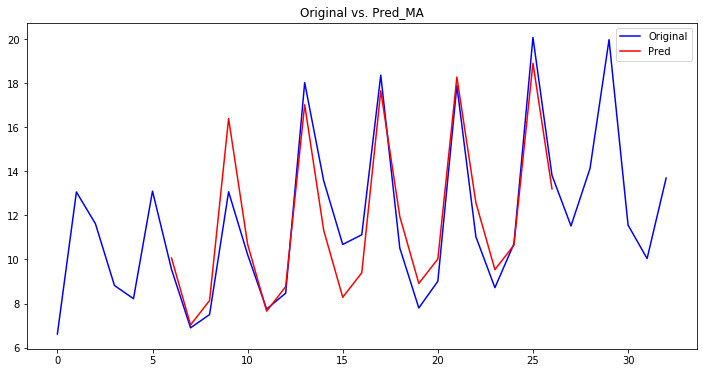

0.8825827176744394


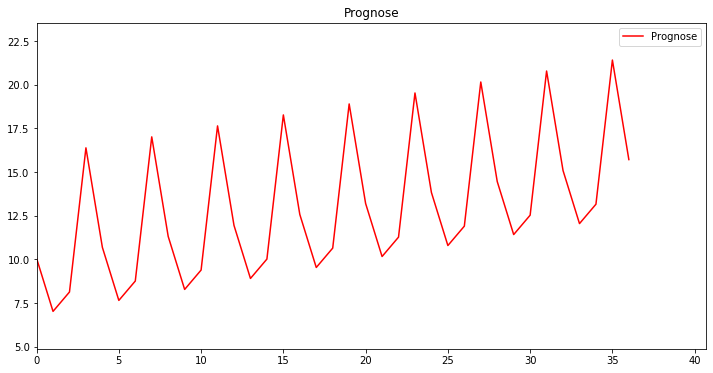

In [19]:
#-----------------------
# Parameter

"""
#---------
# Alibaba
k = 3
weights = [1, 0.75, 1, 1, 1, 0.6, 1]
"""
#---------
# Apple
k = 6
weights = [1, 1, 1, 1, 0.75, 1, 1, 1, 0.6, 1, 1, 1, 1]
"""
#---------
# Amazon
k = 3
weights = [1, 0.75, 1, 1, 1, 0.6, 1]
"""

steigung, intercept, saison_komponente, r, _ = do_anything(k, revenues, weights=weights, exp=False, return_model=True, plot=True, include_season=True)
print(r)

#-----------------------
# Fortschreibung

prognose_zeitraum = list(range(1, len(revenues) + 5))

_ = future_predict(intercept, steigung, saison_komponente, prognose_zeitraum, exp=False)